# Analysis file for nvidia/llama-nemotron-8b

In [1]:
import pandas as pd

In [2]:
df_Nemotron_cosim = pd.read_parquet('./df_Nemotron_cosim.parquet')
df_Nemotron_cosim.head()

,topic,length,AI_model,humanizer,AI_essay,humanized_essay,AI_embedding,humanized_embedding,Nemotron_cosim
0,1,1,gemini2.5pro,AIHumanizer,The integration of social media into the lives...,The way social media has woven itself into the...,"[-0.007160546, -0.0003037693, -0.006392883, -0...","[-0.013025091, 0.0053213853, -0.01455603, -0.0...",0.907571
1,1,1,gemini2.5pro,Grammarly,The integration of social media into the lives...,Social media has become a big part of young pe...,"[-0.007160546, -0.0003037693, -0.006392883, -0...","[-0.0066511543, 0.0019869793, -0.01906914, 0.0...",0.848066
2,1,1,gemini2.5pro,HumanizeAI,The integration of social media into the lives...,The penetration of social media into the lives...,"[-0.007160546, -0.0003037693, -0.006392883, -0...","[-0.004271907, -0.0030379181, -0.008151056, -0...",0.934771
3,1,1,gemini2.5pro,Quillbot,The integration of social media into the lives...,Social media's introduction into young people'...,"[-0.007160546, -0.0003037693, -0.006392883, -0...","[-0.00037478175, -0.0058011212, -0.008065408, ...",0.936948
4,1,1,gemini2.5pro,UndetectableAI,The integration of social media into the lives...,Young people face a harmful environment throug...,"[-0.007160546, -0.0003037693, -0.006392883, -0...","[0.009485136, 0.0016668144, -0.011159632, 0.01...",0.844359


In [5]:
# validate the file with first row
import numpy as np
emb1 = df_Nemotron_cosim.loc[0, 'AI_embedding']
emb2 = df_Nemotron_cosim.loc[0, 'humanized_embedding']
cosim = (emb1 @ emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
print(cosim == df_Nemotron_cosim.loc[0, 'Nemotron_cosim'])  # Should print True

True


# Visualization (Duplicate with main file)

In [12]:
#remove the outlier
df_cosim_cleaned = df_Nemotron_cosim.drop(index=161)
df_cosim_cleaned.reset_index(inplace=True, drop=True)
df_cosim_humanizer_length = df_cosim_cleaned.groupby(['humanizer', 'length'])['Nemotron_cosim'].mean().reset_index()
df_cosim_humanizer_length['length'] = df_cosim_humanizer_length['length'].map({1: 'short', 2: 'medium', 3: 'long'})
df_cosim_humanizer_length

,humanizer,length,Nemotron_cosim
0,AIHumanizer,short,0.944642
1,AIHumanizer,medium,0.954717
2,AIHumanizer,long,0.960100
3,Grammarly,short,0.941940
4,Grammarly,medium,0.937441
5,Grammarly,long,0.925990
6,HumanizeAI,short,0.920761
7,HumanizeAI,medium,0.919458
8,HumanizeAI,long,0.941691
9,Quillbot,short,0.946670


In [13]:
df_cosim_humanizer = df_cosim_cleaned.groupby('humanizer')['Nemotron_cosim'].mean().reset_index()
df_cosim_humanizer = df_cosim_humanizer.sort_values(by='Nemotron_cosim')
df_cosim_humanizer

,humanizer,Nemotron_cosim
5,writehuman.ai,0.894185
4,UndetectableAI,0.896103
2,HumanizeAI,0.927303
1,Grammarly,0.935124
0,AIHumanizer,0.953153
3,Quillbot,0.955062


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
custom_palette = sns.color_palette(['#B08A4C', '#675200', '#250000'])
sns.set_palette(custom_palette)

/var/folders/sl/36wj2dpn1fvgpr5ydrsxz8wm0000gn/T/ipykernel_29422/152451114.py:19: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 4
  ax.legend(handles=handles, labels=labels, title='Essay Length / Mean', bbox_to_anchor=(1, 1), loc='upper left')


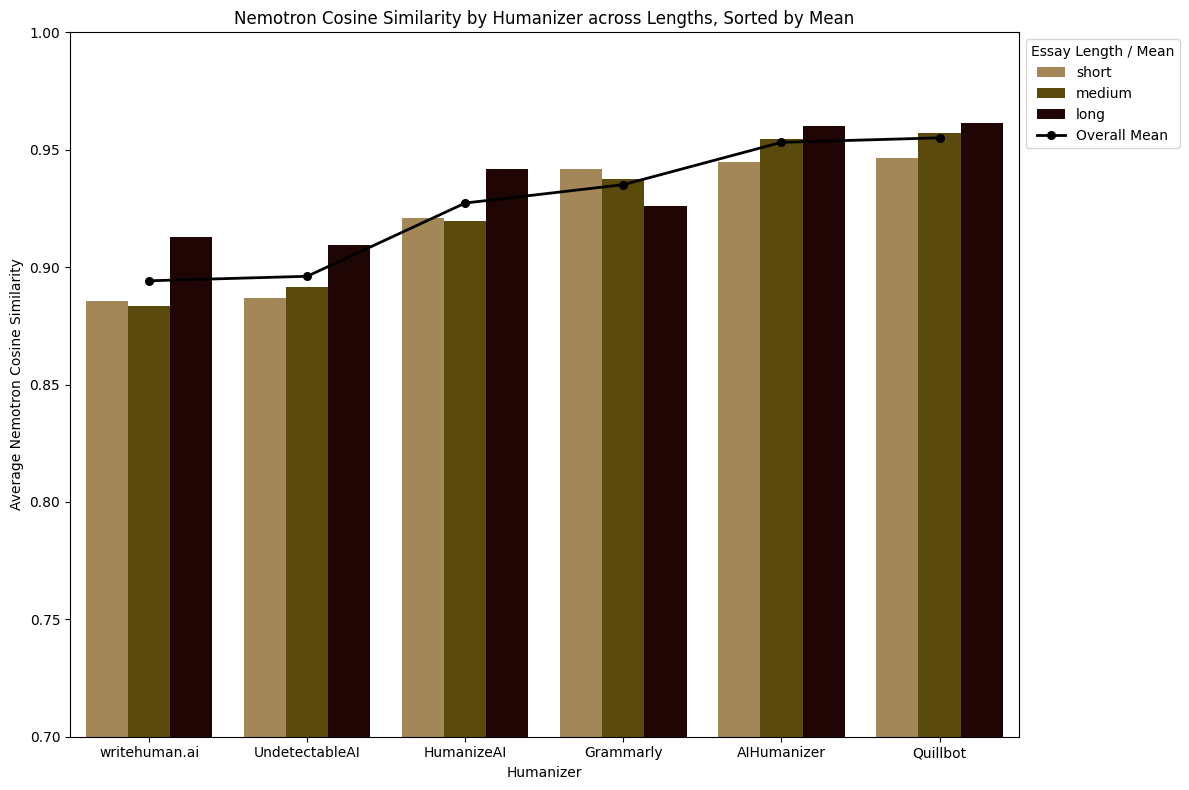

In [16]:
sorted_humanizer_order = df_cosim_humanizer['humanizer'].tolist()

from matplotlib.lines import Line2D
plt.figure(figsize=(12,8))

#bar plot
ax = sns.barplot(data=df_cosim_humanizer_length, x='humanizer', y='Nemotron_cosim', hue='length', order=sorted_humanizer_order, )

#line plot of mean
sns.pointplot(data=df_cosim_humanizer, x='humanizer', y='Nemotron_cosim', color='black', markers='o', label='Overall Mean', order=sorted_humanizer_order, linewidth=2)

plt.title('Nemotron Cosine Similarity by Humanizer across Lengths, Sorted by Mean')
plt.xlabel('Humanizer')
plt.ylabel('Average Nemotron Cosine Similarity')

handles, labels = ax.get_legend_handles_labels()

handles.append(Line2D([0], [0], color='black', marker='_', linestyle='-', markersize=3, linewidth=0.4))
ax.legend(handles=handles, labels=labels, title='Essay Length / Mean', bbox_to_anchor=(1, 1), loc='upper left')
#set y-axis limit
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()